In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

**Load And Inspect The Data**


In [2]:
data = pd.read_csv("NonLinear_Data_.csv")

In [3]:
data.sample(5)

,Feature1,Feature2,Target
198,-0.153111,0.552924,1
40,-0.228111,-0.125731,0
200,-0.163479,0.491520,1
96,-0.039170,0.347953,1
184,0.166244,-0.024269,0


In [4]:
data.shape

(211, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  211 non-null    float64
 1   Feature2  211 non-null    float64
 2   Target    211 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.1 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature1,211.0,-0.130246,0.200516,-0.596774,-0.287903,-0.130300,0.013825,0.297235
Feature2,211.0,-0.059743,0.314751,-0.657895,-0.313889,-0.052924,0.192690,0.573392
Target,211.0,0.502370,0.501183,0.000000,0.000000,1.000000,1.000000,1.000000


**Data Visualization**


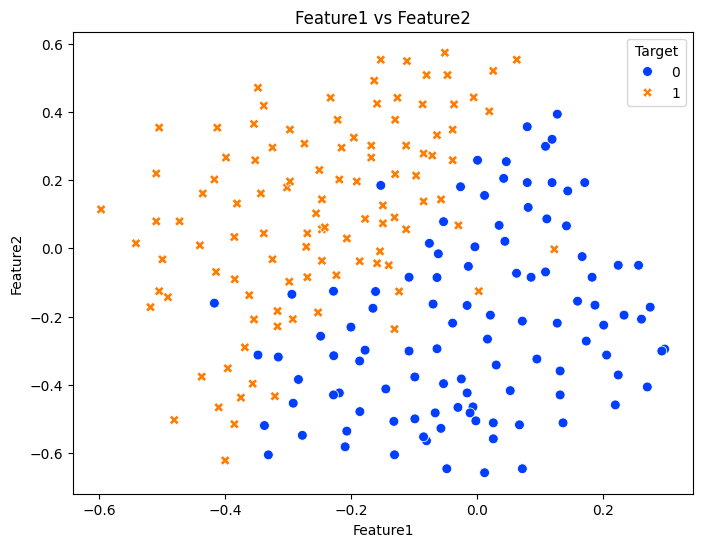

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x="Feature1",
    y="Feature2",
    hue="Target",
    style="Target",
    palette="bright",
    s=50,
)
plt.title("Feature1 vs Feature2")
plt.show()

**Data Preparation**


In [8]:
X = data.drop("Target", axis=1).values
y = data["Target"].values

**Train The SVM Model**


In [9]:
svm_clf = SVC(C=1, kernel="poly", random_state=42)
svm_clf.fit(X, y)

SVC(C=1, kernel='poly', random_state=42)

**Visualize the Decision Boundary**


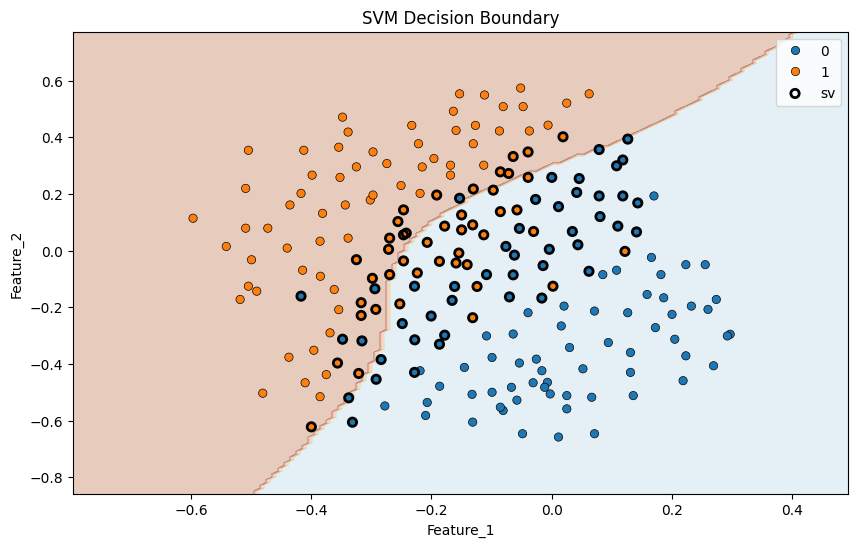

In [10]:
def plot_decision_boundary(
    model,
    X,
    y,
    sv=False,
    scaler=None,
    step_size=0.01,
    xlabel=None,
    ylabel=None,
    title=None,
):
    if scaler != None:
        X = scaler.inverse_transform(X)
    y = y.ravel()

    # Calculate range based on feature median for coverage
    x_range, y_range = 0.2,0.2
    x_min, x_max = X[:, 0].min() - x_range, X[:, 0].max() + x_range
    y_min, y_max = X[:, 1].min() - y_range, X[:, 1].max() + y_range

    # Define step size for mesh grid
    # step_size -> Increase the step size to reduce memory usage
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size)
    )

    # Predict on the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if scaler == None:
        Z = model.predict(grid_points).reshape(xx.shape)
    else:
        Z = model.predict(scaler.transform(grid_points)).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="Paired", alpha=0.3)

    # Plot data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="k")

    if sv == True:
        sv_points = model.support_vectors_
        plt.scatter(
            sv_points[:, 0], sv_points[:, 1], facecolors="none", edgecolors="k", linewidths=2, label="sv"
        )

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title("Decision Boundary with Data Points" if title == None else title)
    plt.xlabel("Feature_1" if xlabel == None else xlabel)
    plt.ylabel("Feature_2" if ylabel == None else ylabel)
    plt.legend()
    plt.show()

plot_decision_boundary(svm_clf, X, y, sv=True,title="SVM Decision Boundary")